<a href="https://colab.research.google.com/github/Gloou-ui/NM/blob/main/%D0%9B%D0%91_3_%D0%B2%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_17_%D0%9B%D0%B8%D1%82%D0%B2%D0%B8%D0%BD_%D0%9C_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numdifftools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 6.8 MB/s eta 0:00:00


In [ ]:
#Лабораторна робота 3. Метод Ньютона (дотичних). Комбінований метод

import numpy as np
import numdifftools as nd

def f(x):
    return x**3 + 4*x - 6

def nuton(a, b, eps, f):
    df1 = nd.Derivative(f, n=1)   # створюємо callable для 1-ї похідної
    df2 = nd.Derivative(f, n=2)   # і для 2-ї
    xi = b if f(b) * df2(b) > 0 else a

    xi_1 = xi - f(xi) / df1(xi)
    while np.abs(xi_1 - xi) > eps:
        xi = xi_1
        d = df1(xi)
        if d == 0:
            raise ZeroDivisionError("Похідна дорівнює нулю — зупинка.")
        xi_1 = xi - f(xi) / d

    print('Метод Ньютона, x =', round(float(xi_1), 4))

In [ ]:
def komb(a, b, eps, f):
    df2 = nd.Derivative(f, n=2)(a)
    if f(a) * df2 > 0:
        a0, b0 = a, b
    else:
        a0, b0 = b, a
    ai, bi = a0, b0

    while np.abs(ai - bi) > eps:
        ai_1 = ai - f(ai) * (bi - ai) / (f(bi) - f(ai))
        bi_1 = bi - f(bi) / nd.Derivative(f, n=1)(bi)
        ai, bi = ai_1, bi_1

    x = (ai_1 + bi_1) / 2

    print('Комбінований метод, x = ', x.round(4))


In [ ]:
if __name__ == "__main__":
    a1, b1 = -2, -1
    a2, b2 = 0, 1
    eps = 0.001

    print("Розв'язання на відрізку [-2, -1]")
    nuton(a1, b1, eps, f)
    komb(a1, b1, eps, f)
    print("\n Розв'язання на відрізку [0, 1]")
    nuton(a2, b2, eps, f)
    komb(a2, b2, eps, f)

Розв'язання на відрізку [-2, -1]
Метод Ньютона, x = 1.1347
Комбінований метод, x =  1.1348

 Розв'язання на відрізку [0, 1]
Метод Ньютона, x = 1.1347
Комбінований метод, x =  1.1354


In [ ]:
!pip install numdifftools

In [ ]:
import numdifftools as nd

Визначаємо, що корінь належить відрізку [-3, -1]

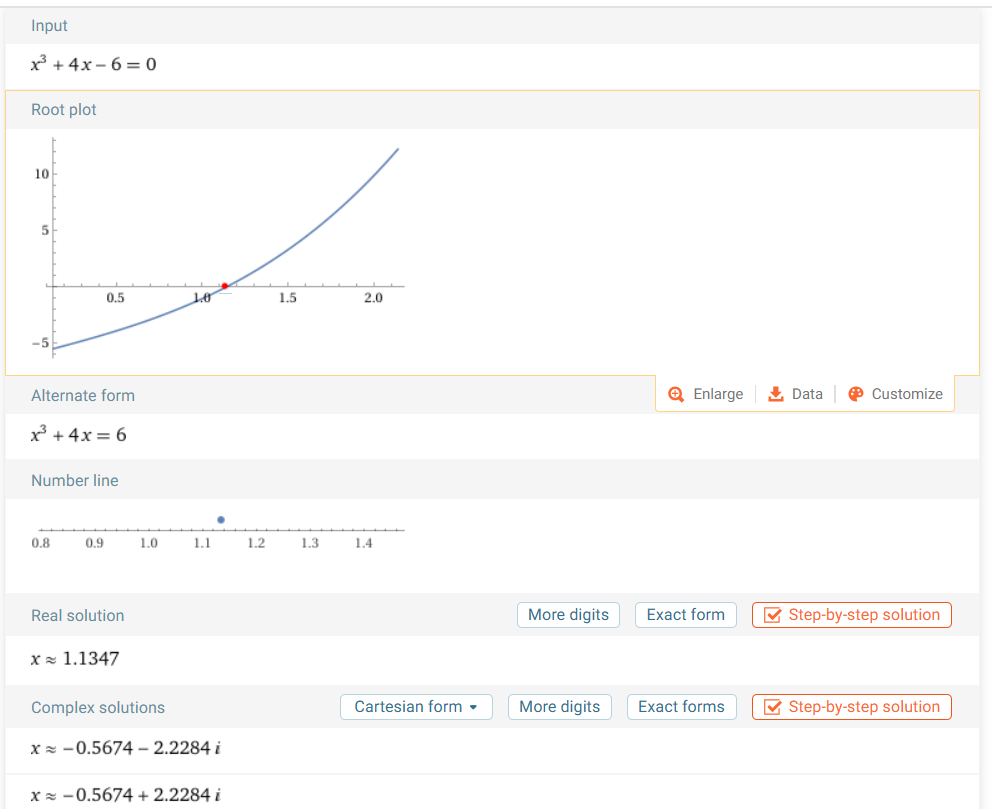

In [ ]:
def f(x: float):
    return x**3 - x + 7

def fprime(x: float):
    return nd.Derivative(f, n=1)

def phi(x: float):
    # c = -0.1 (забезпечує |phi'(x)|<1 на [-3,-1])
    return x - 0.1 * f(x)

def iterate_fixed_point(x0: float, iters: int = 5):
    xs = [x0]
    x = x0
    for _ in range(iters):
        x = phi(x)
        xs.append(x)
    return xs

def error_bound(x_last: float) -> float:
    # μ = min_{x∈[-3,-1]} |f'(x)| = 2
    mu = 2.0
    return abs(f(x_last)) / mu



In [ ]:
def main():
    x0 = -1.0
    iters = 5
    xs = iterate_fixed_point(x0, iters)
    print("Fixed-point iteration for f(x) = x^3 - x + 7 with phi(x) = x - 0.1*f(x)")
    print(f"Interval: [-3, -1], start x0 = {x0}")
    for i, xi in enumerate(xs):
        if i == 0:
            print(f"x_{i} = {xi:.10f}")
        else:
            print(f"x_{i} = phi(x_{i-1}) = {xi:.10f}")
    bound = error_bound(xs[-1])
    print("\nError bound after 5 iterations:  |ξ - x5| ≤ |f(x5)| / μ")
    print(f"f(x5) = {f(xs[-1]):.10f},  μ = 2  ⇒  |ξ - x5| ≤ {bound:.10f}")
    return xs[-1], bound

if __name__ == "__main__":
    root_approx, bound = main()

Fixed-point iteration for f(x) = x^3 - x + 7 with phi(x) = x - 0.1*f(x)
Interval: [-3, -1], start x0 = -1.0
x_0 = -1.0000000000
x_1 = phi(x_0) = -1.7000000000
x_2 = phi(x_1) = -2.0787000000
x_3 = phi(x_2) = -2.0883650417
x_4 = phi(x_3) = -2.0864094687
x_5 = phi(x_4) = -2.0868145769

Error bound after 5 iterations:  |ξ - x5| ≤ |f(x5)| / μ
f(x5) = -0.0008352720,  μ = 2  ⇒  |ξ - x5| ≤ 0.0004176360


Спрощений варіант коду


In [ ]:
# Рівняння: f(x) = x^3 - x + 7 = 0
# Ітераційна функція: φ(x) = x - 0.1 * f(x)  (c = -0.1)
# Початкове наближення: x0 = -1
# Кількість ітерацій: 5
# Оцінка похибки: |ξ - x5| ≤ |f(x5)| / μ, де μ = min_{[-3,-1]} |f'(x)| = 2

def f(x):
    return x**3 - x + 7

def phi(x):
    return x - 0.1 * f(x)   # c = -0.1

def fixed_point(x0=-1.0, iters=5):
    xs = [x0]
    for _ in range(iters):
        xs.append(phi(xs[-1]))
    return xs

# Запуск і вивід результатів
xs = fixed_point(-1.0, 5)

for i, xi in enumerate(xs):
    print(f"x_{i} = {xi:.10f}")

# Похибка методу простої ітерації після 5-ї ітерації
mu = 2.0                      # μ = min_{[-3,-1]} |3x^2 - 1| = 2
err_bound = abs(f(xs[-1]))/mu
print(f"\nОцінка похибки: |ξ - x5| ≤ {err_bound:.10f}")

x_0 = -1.0000000000
x_1 = -1.7000000000
x_2 = -2.0787000000
x_3 = -2.0883650417
x_4 = -2.0864094687
x_5 = -2.0868145769

Оцінка похибки: |ξ - x5| ≤ 0.0004176360
